In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binary-classification/10_2024_09_03_3553.JPG
/kaggle/input/binary-classification/10_2024_09_03_3596.JPG
/kaggle/input/binary-classification/10_2024_09_03_3556.JPG
/kaggle/input/binary-classification/10_2024_09_03_3547.JPG
/kaggle/input/binary-classification/10_2024_09_03_3552.JPG
/kaggle/input/binary-classification/10_2024_09_03_3590.JPG
/kaggle/input/binary-classification/10_2024_09_03_3574.JPG
/kaggle/input/binary-classification/10_2024_09_03_3603.JPG
/kaggle/input/binary-classification/10_2024_09_03_3594.JPG
/kaggle/input/binary-classification/10_2024_09_03_3601.JPG
/kaggle/input/binary-classification/10_2024_09_03_3625.JPG
/kaggle/input/binary-classification/10_2024_09_03_3623.JPG
/kaggle/input/binary-classification/10_2024_09_03_3595.JPG
/kaggle/input/binary-classification/10_2024_09_03_3600.JPG
/kaggle/input/binary-classification/10_2024_09_03_3537.JPG
/kaggle/input/binary-classification/10_2024_09_03_3517.JPG
/kaggle/input/binary-classification/10_2024_09_03_3617.J

In [11]:
!pip install tensorflow keras numpy matplotlib


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
import os


In [13]:
import os
import shutil
import random
import cv2
import numpy as np
import imgaug.augmenters as iaa

# === Paths ===
dataset_8CB = "/kaggle/input/binary-class-8cb"
dataset_5CB = "/kaggle/input/binary-classification"
output_path = "/kaggle/working/binary-classification-dataset"

# === Categories ===
categories = {
    "8CB": dataset_8CB,
    "5CB": dataset_5CB
}

# === Split ratios ===
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# === Create directory structure ===
for split in ["train", "val", "test"]:
    for category in categories.keys():
        os.makedirs(os.path.join(output_path, split, category), exist_ok=True)

# === Define augmentation pipeline ===
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(rotate=(-20, 20), scale=(0.8, 1.2)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
    iaa.Multiply((0.8, 1.2)),
    iaa.GammaContrast((0.5, 1.5)),
    iaa.GaussianBlur(sigma=(0, 1.0)),
])

# === Split and augment ===
for category, source_folder in categories.items():
    images = [f for f in os.listdir(source_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    train_split = int(train_ratio * len(images))
    val_split = int(val_ratio * len(images))

    for i, img_name in enumerate(images):
        img_path = os.path.join(source_folder, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"❌ Skipping unreadable image: {img_name}")
            continue

        if i < train_split:
            split = "train"
        elif i < train_split + val_split:
            split = "val"
        else:
            split = "test"

        # Base filename
        base, ext = os.path.splitext(img_name)
        base_filename = f"{category}_{i}"

        # Save original image
        dst_dir = os.path.join(output_path, split, category)
        original_path = os.path.join(dst_dir, f"{base_filename}_orig.jpg")
        cv2.imwrite(original_path, img)

        # Generate and save 9 augmentations (total = 10 images per original)
        aug_images = augmenter(images=[img] * 9)
        for j, aug_img in enumerate(aug_images):
            aug_path = os.path.join(dst_dir, f"{base_filename}_aug{j+1}.jpg")
            cv2.imwrite(aug_path, aug_img)

        print(f"✅ {split.upper()} - {category} - {img_name} augmented")

print(f"\n🎉 Dataset split and augmented successfully at: {output_path}")


✅ TRAIN - 8CB - 27.1533.jpeg augmented
✅ TRAIN - 8CB - 25.5533.jpeg augmented
✅ TRAIN - 8CB - 22.5500.jpeg augmented
✅ TRAIN - 8CB - 30.3533.jpeg augmented
✅ TRAIN - 8CB - 30.5533.jpeg augmented
✅ TRAIN - 8CB - 27.0533.jpeg augmented
✅ TRAIN - 8CB - 22.8500.jpeg augmented
✅ TRAIN - 8CB - 25.7533.jpeg augmented
✅ TRAIN - 8CB - 27.8533.jpeg augmented
✅ TRAIN - 8CB - 37.4567 (1).jpeg augmented
✅ TRAIN - 8CB - 31.0533.jpeg augmented
✅ TRAIN - 8CB - 29.8533.jpeg augmented
✅ TRAIN - 8CB - 37.0567.jpeg augmented
✅ TRAIN - 8CB - 22.3500.jpeg augmented
✅ TRAIN - 8CB - 22.7500.jpeg augmented
✅ TRAIN - 8CB - 33.1567.jpeg augmented
✅ TRAIN - 8CB - 22.9500.jpeg augmented
✅ TRAIN - 8CB - 32.7567.jpeg augmented
✅ TRAIN - 8CB - 23.0500.jpeg augmented
✅ TRAIN - 8CB - 37.0567 (1).jpeg augmented
✅ TRAIN - 8CB - 23.1500.jpeg augmented
✅ TRAIN - 8CB - 37.8567.jpeg augmented
✅ TRAIN - 8CB - 29.0533.jpeg augmented
✅ VAL - 8CB - 25.8533.jpeg augmented
✅ VAL - 8CB - 22.4500.jpeg augmented
✅ VAL - 8CB - 25.9533

In [14]:
print("\n📁 Dataset Split Summary:")
for split in ["train", "val", "test"]:
    print(f"\n🔹 {split.upper()} SET")
    for category in categories.keys():
        folder_path = os.path.join(output_path, split, category)
        num_images = len(os.listdir(folder_path))
        print(f"  - {category}: {num_images} images")



📁 Dataset Split Summary:

🔹 TRAIN SET
  - 8CB: 230 images
  - 5CB: 880 images

🔹 VAL SET
  - 8CB: 60 images
  - 5CB: 250 images

🔹 TEST SET
  - 8CB: 40 images
  - 5CB: 140 images


In [15]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.device = device  


Classes: ['5CB', '8CB']

Epoch 1/10
Train Loss: 6.8679 | Train Acc: 0.9721 | Val Acc: 0.8355

Epoch 2/10
Train Loss: 7.1330 | Train Acc: 0.9685 | Val Acc: 0.9935

Epoch 3/10
Train Loss: 2.1618 | Train Acc: 0.9919 | Val Acc: 1.0000

Epoch 4/10
Train Loss: 1.4119 | Train Acc: 0.9955 | Val Acc: 1.0000

Epoch 5/10
Train Loss: 0.9599 | Train Acc: 0.9964 | Val Acc: 1.0000

Epoch 6/10
Train Loss: 0.0642 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 7/10
Train Loss: 0.3939 | Train Acc: 0.9982 | Val Acc: 1.0000

Epoch 8/10
Train Loss: 0.0192 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 9/10
Train Loss: 0.0126 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 10/10
Train Loss: 0.5465 | Train Acc: 0.9973 | Val Acc: 1.0000

Test Classification Report:
              precision    recall  f1-score   support

         5CB       1.00      0.99      1.00       140
         8CB       0.98      1.00      0.99        40

    accuracy                           0.99       180
   macro avg       0.99      1.00     

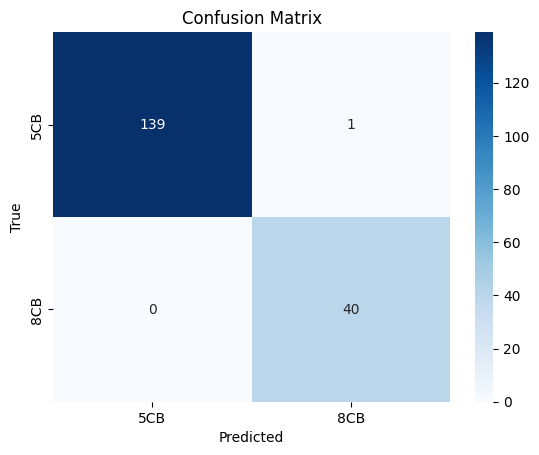

In [16]:
import os
import torch
from torch import nn, optim
from torchvision import datasets, models, transforms
from tensorflow.keras.applications import ResNet50
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Paths
data_dir = "/kaggle/working/binary-classification-dataset"

# Transforms
transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
}

# Datasets
datasets_dict = {
    split: datasets.ImageFolder(os.path.join(data_dir, split), transform=transform[split])
    for split in ['train', 'val', 'test']
}

# Dataloaders
dataloaders = {
    split: DataLoader(datasets_dict[split], batch_size=16, shuffle=True)
    for split in ['train', 'val', 'test']
}

# Classes
class_names = datasets_dict['train'].classes
print("Classes:", class_names)

# Model (ResNet18)
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2) 
model = model.to(device)
model.device = device

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training Loop
def train_model(model, epochs=10):
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        train_loss, correct = 0, 0

        for images, labels in dataloaders['train']:
            images, labels = images.to(model.device), labels.to(model.device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(output, 1)
            correct += (preds == labels).sum().item()

        val_acc = evaluate_model(model, 'val')
        print(f"Train Loss: {train_loss:.4f} | Train Acc: {correct/len(datasets_dict['train']):.4f} | Val Acc: {val_acc:.4f}")

# Evaluation Function
def evaluate_model(model, split):
    model.eval()
    correct = 0
    with torch.no_grad():
        for images, labels in dataloaders[split]:
            images, labels = images.to(model.device), labels.to(model.device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
    return correct / len(datasets_dict[split])

# Train it!
train_model(model, epochs=10)

# Test Performance
def test_model(model):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in dataloaders['test']:
            images = images.to(model.device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu())
            all_labels.extend(labels)

    # Metrics
    print("\nTest Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

test_model(model)


In [21]:
def train_model(model, epochs=10):
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        running_loss, correct = 0, 0

        for images, labels in dataloaders['train']:
            images, labels = images.to(model.device), labels.to(model.device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(output, 1)
            correct += (preds == labels).sum().item()

        epoch_loss = running_loss / len(dataloaders['train'])
        epoch_acc = correct / len(datasets_dict['train'])
        val_acc = evaluate_model(model, 'val')

        train_losses.append(epoch_loss)
        val_accuracies.append(val_acc)

        print(f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f}")


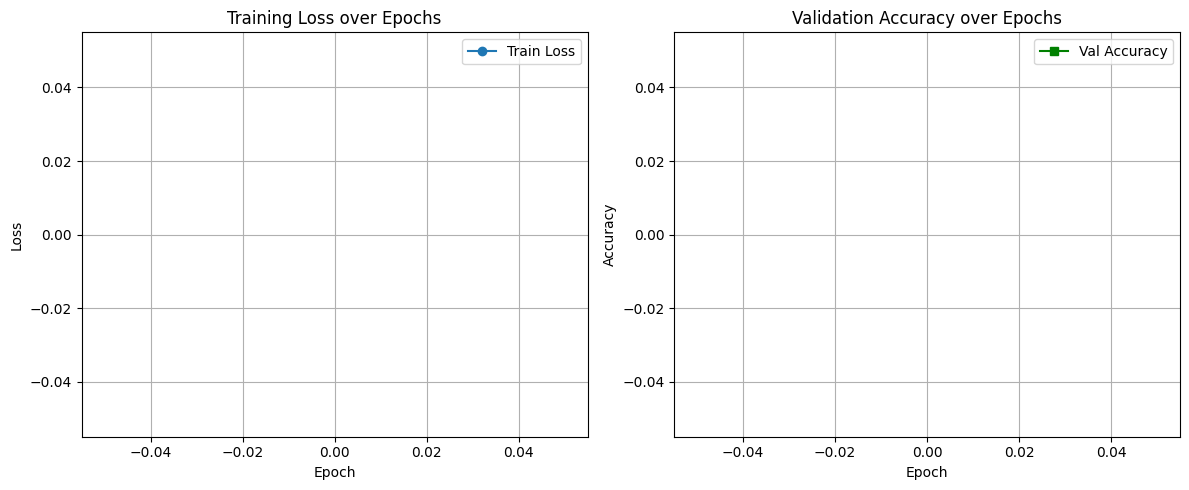

In [23]:
# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o', label='Train Loss')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, marker='s', color='green', label='Val Accuracy')
plt.title("Validation Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
